In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append('../src')
from config import *
from agent import *
from environment import *
from action_slotpair import *

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dict_action_slotpair, dict_slotpair_action = generate_dict_action_slotpair()

In [3]:
np.random.seed(12)
num_samples = 300000
max_val = 10
samples = [np.random.choice(max_val, size=NUM_SLOTS, replace=False) for _ in range(num_samples)]
dfd = pd.DataFrame(samples)
df_sample = dfd.drop_duplicates()
vals = df_sample.values
sample_all = [vals[i, :] for i in range(vals.shape[0])]
sample_train = sample_all[:200000]
sample_test = sample_all[200000:]
print(len(sample_train))
print(len(sample_test))

200000
87987


In [4]:
samples = sample_train[:1000]

In [ ]:
env = Environment()
agent = DQNAgent(env, init_model=False)
agent.train(samples)

<State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]>
0
100
200
300
400
500
600
700
800
900


In [ ]:
scores = copy.deepcopy(agent.log.scores2)
#scores = np.trim_zeros(scores)
scores

array([[-9., -7., -5., ..., 13., 11., 13.],
       [ 3.,  5.,  7., ..., 21., 23., 25.],
       [11.,  1., 11., ..., 17., 11., 17.],
       ...,
       [ 7., 13., 15., ...,  0.,  0.,  0.],
       [ 7.,  9., 11., ..., -7., -5., -3.],
       [ 1.,  3.,  5., ..., 39., 41., 39.]])

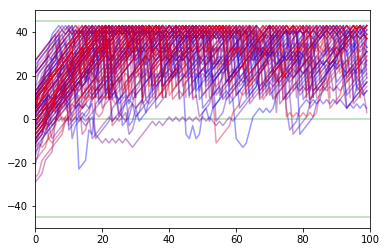

In [ ]:
num_eps = scores.shape[0]
step = 10
nums = num_eps // step
for i in range(nums):
    scs = scores[i * step, :]
    scs = np.trim_zeros(scs)
    plt.plot(np.arange(len(scs)), scs, color=(i/nums, 0, 1 - i/nums), alpha=0.4)


plt.hlines(y=45, xmin=0, xmax=NUM_MAX_STEPS, color='g', alpha=0.3)
plt.hlines(y=0, xmin=0, xmax=NUM_MAX_STEPS, color='g', alpha=0.3)
plt.hlines(y=-45, xmin=0, xmax=NUM_MAX_STEPS, color='g', alpha=0.3)
plt.ylim((-50, 50))
plt.xlim((0, NUM_MAX_STEPS))
plt.show()

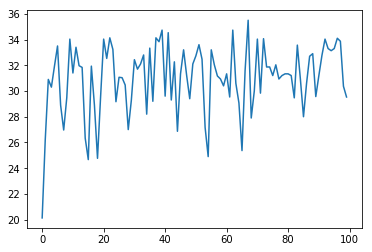

In [ ]:
scs = copy.deepcopy(scores)
scs_last = np.array([scs[i][scs[i] != 0][-3:].mean() for i in range(scs.shape[0])])

num = 10
eval_avg = []
for i in range(0, len(scs_last), num):
    eval_avg.append(scs_last[i:i+num].mean())
eval_avg = np.array(eval_avg)
plt.plot(np.arange(len(eval_avg)), eval_avg)
plt.show()

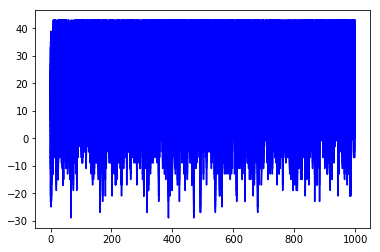

In [ ]:
plt.plot(np.arange(len(scores)), scores, color='b')
plt.show()

In [ ]:
sc = copy.deepcopy(scores)
sc = sc.ravel()
sc = sc[sc != 0]
pd.Series(sc).value_counts().sort_index()

-29.0       3
-27.0       8
-25.0       9
-23.0      19
-21.0      40
-19.0      54
-17.0      88
-15.0     123
-13.0     146
-11.0     222
-9.0      309
-7.0      357
-5.0      439
-3.0      539
-1.0      652
 1.0      779
 3.0      950
 5.0     1121
 7.0     1266
 9.0     1540
 10.0     532
 11.0    1756
 13.0    1981
 15.0    2139
 17.0    2256
 19.0    2515
 21.0    2737
 23.0    2796
 25.0    2932
 27.0    3045
 29.0    3149
 31.0    3422
 33.0    3595
 35.0    3851
 37.0    5217
 39.0    7116
 41.0    7922
 43.0    4259
dtype: int64

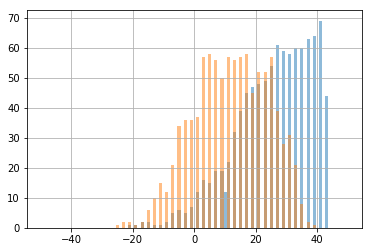

In [ ]:
pd.Series(sc[-1000:]).hist(bins=np.arange(-49.5, 50.5, 1), alpha=0.5)
pd.Series(sc[:1000]).hist(bins=np.arange(-49.5, 50.5, 1), alpha=0.5)
#plt.yscale('log')
plt.show()

In [ ]:
print(len(agent.memory.pool[10]))
print(len(agent.memory.pool[1]))
print(len(agent.memory.pool[-1]))

0
2000
2000


In [ ]:
agent.eps.epsilon

0.1

In [ ]:
s1, a, s2, r, d = agent.memory.pool[1][-2]
print(s1.array)
print(s2.array)
print(a, dict_action_slotpair[a])
print(r)

[0 1 2 3 4 5 9 6 7 8]
[0 1 2 3 4 5 7 6 9 8]
40 (6, 8)
1


In [ ]:
def compute_score(arr):
    comp = arr[np.newaxis, :] - arr[:, np.newaxis]
    slice1, slice2 = np.triu_indices(NUM_SLOTS, 1)
    comp_flat = comp[slice1, slice2]
    comp_flat[comp_flat > 0] = 1
    comp_flat[comp_flat < 0] = -1
    return comp_flat.sum()

print(compute_score(s1.array))
print(compute_score(s2.array))

39
41


In [ ]:
tests = sample_test[:10]

In [17]:
env_app = Environment()
agent_app = DQNAgent(env_app, init_model=False)
agent_app.apply(tests)

<State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]>


In [20]:
scores_app = agent_app.scores2
scores_app.shape

(10, 100)

In [21]:
for i in range(10):
    print(scores_app[i, :].astype(int))

[15 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21
 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21
 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21
 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21
 23 21 23 21]
[-5  5 15 17 19 25 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29
 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29
 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29
 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29
 27 29 27 29]
[19 21 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25
 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25
 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25
 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25
 23 25 23 25]
[-1 17 23 25 31 29 31 29 31 29 31 29 31 29 31 29 31 29 31 29 31 29 31 29
 31 29 31

In [48]:
arr1 = np.array([ 3, 13,  2, 16, 14,  5,  4,  0,  8, 18])
arr2 = np.array([ 3, 4,  2, 16, 14,  5,  13,  0,  8, 18])
arr3 = np.array([ 3, 4,  2, 16, 14,  0,  13,  5,  8, 18])
qs = []
for arr in [arr1, arr2, arr3]:
    q = agent_app.compute_Q(agent_app.model, arr)
    qs.append(q.data)
    idx = np.argmax(q.data)
    print(compute_score(arr), idx, dict_action_slotpair[idx])

5 25 (3, 5)
11 25 (3, 5)
13 25 (3, 5)


In [17]:
import random

In [21]:
a =list(range(10))
random.sample(a, 15)

ValueError: Sample larger than population or is negative

In [16]:
a = []
a.extend([])
a

[]

In [33]:
self.rewards['negative']

NameError: name 'self' is not defined